In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-25.13123077030174, -1.3030586187809376),
 (-31.50860221863836, 72.47894038617284),
 (4.044503952455742, -59.543545638306526),
 (-38.021905391734286, 126.15632875220598),
 (48.93560850748477, -165.3100866768878),
 (48.07848434474147, 112.9156701547999),
 (-7.125492303914072, 103.1481650608485),
 (-69.8570219048611, -31.048999404797115),
 (12.205466287508727, 152.0119687645926),
 (-38.393917874263096, 158.79968169348643),
 (-70.62965235278952, 126.55899139010216),
 (12.776643342039165, -128.91704886053924),
 (-77.74402240928131, -32.435911244094996),
 (-65.12554672530348, 177.38527475176534),
 (-42.578868748967665, 4.6719397893141945),
 (53.555316949378266, 70.16180968501445),
 (48.07212455609141, -52.05749605350074),
 (27.702422862657258, -135.49292783069959),
 (53.928363291240856, -19.694585175833595),
 (38.45312793805334, 108.92165641236284),
 (-72.05041062694548, -47.48637467131388),
 (86.60656935046464, 24.023840497388477),
 (29.57157351130644, -62.52884351610217),
 (-51.56173198

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-25.13123077030174 -1.3030586187809376
-31.50860221863836 72.47894038617284
4.044503952455742 -59.543545638306526
-38.021905391734286 126.15632875220598
48.93560850748477 -165.3100866768878
48.07848434474147 112.9156701547999
-7.125492303914072 103.1481650608485
-69.8570219048611 -31.048999404797115
12.205466287508727 152.0119687645926
-38.393917874263096 158.79968169348643
-70.62965235278952 126.55899139010216
12.776643342039165 -128.91704886053924
-77.74402240928131 -32.435911244094996
-65.12554672530348 177.38527475176534
-42.578868748967665 4.6719397893141945
53.555316949378266 70.16180968501445
48.07212455609141 -52.05749605350074
27.702422862657258 -135.49292783069959
53.928363291240856 -19.694585175833595
38.45312793805334 108.92165641236284
-72.05041062694548 -47.48637467131388
86.60656935046464 24.023840497388477
29.57157351130644 -62.52884351610217
-51.56173198727787 -129.13158497945784
-8.354214691519616 -173.68908739677573
-10.862944332609302 76.20128832460142
-38.408918209

In [6]:
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

575

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    if i > 100:
        break
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | lethem
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | baruun-urt
Processing Record 7 of Set 1 | pringsewu
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | kavieng
Processing Record 10 of Set 1 | nelson bay
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | constitucion
Processing Record 13 of Set 1 | kaitangata
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | krasnoarmeysk
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | pacific grove
Processing Record 18 of Set 1 | vestmannaeyjar
Processing Record 19 of Set 1 | dongsheng
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | hamilton
Processing Record 22 of Set 1 | rikitea
Processing 

In [10]:
len(city_data)

95

In [11]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,45.99,95,100,4.61,US,2022-12-07 00:41:42
1,Bambous Virieux,-20.3428,57.7575,77.25,83,75,11.50,MU,2022-12-07 00:40:45
2,Lethem,3.3803,-59.7968,75.99,85,27,6.35,GY,2022-12-07 00:46:09
3,Esperance,-33.8667,121.9000,62.08,56,53,11.01,AU,2022-12-07 00:46:09
4,Bethel,41.3712,-73.4140,54.55,88,100,5.75,US,2022-12-07 00:39:01
5,Baruun-Urt,46.6806,113.2792,5.59,81,83,8.21,MN,2022-12-07 00:46:10
6,Pringsewu,-5.3582,104.9744,78.17,80,100,2.13,ID,2022-12-07 00:46:10
7,Ushuaia,-54.8000,-68.3000,40.66,56,40,24.16,AR,2022-12-07 00:41:59
8,Kavieng,-2.5744,150.7967,83.95,69,77,9.04,PG,2022-12-07 00:46:10
9,Nelson Bay,-32.7167,152.1500,81.00,67,100,5.99,AU,2022-12-07 00:46:11


In [14]:
new_columns = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_columns]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-12-07 00:41:42,42.0970,-79.2353,45.99,95,100,4.61
1,Bambous Virieux,MU,2022-12-07 00:40:45,-20.3428,57.7575,77.25,83,75,11.50
2,Lethem,GY,2022-12-07 00:46:09,3.3803,-59.7968,75.99,85,27,6.35
3,Esperance,AU,2022-12-07 00:46:09,-33.8667,121.9000,62.08,56,53,11.01
4,Bethel,US,2022-12-07 00:39:01,41.3712,-73.4140,54.55,88,100,5.75
...,...,...,...,...,...,...,...,...,...
90,Kagal,IN,2022-12-07 00:47:43,16.5833,74.3167,62.62,50,99,4.41
91,Guerrero Negro,MX,2022-12-07 00:47:43,27.9769,-114.0611,61.38,65,19,13.51
92,Benguela,AO,2022-12-07 00:47:43,-12.5763,13.4055,77.22,80,100,2.48
93,Yenagoa,NG,2022-12-07 00:47:44,4.9247,6.2642,77.23,87,100,3.58


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
time.strftime("%x")

'12/06/22'

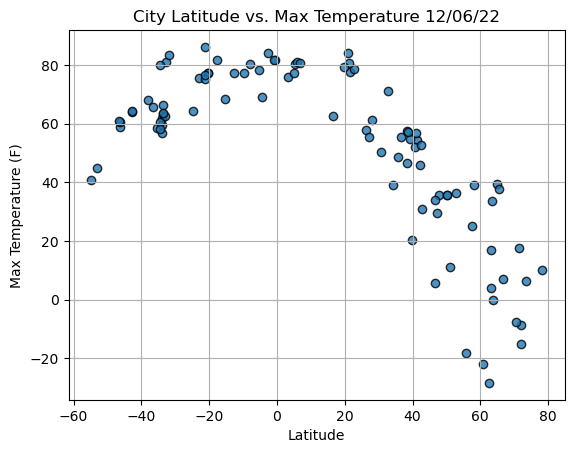

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

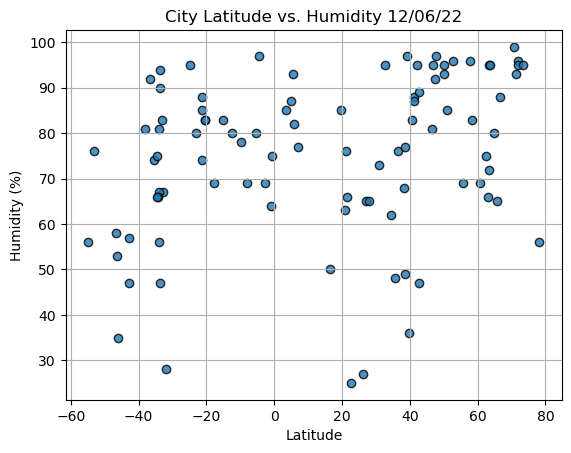

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

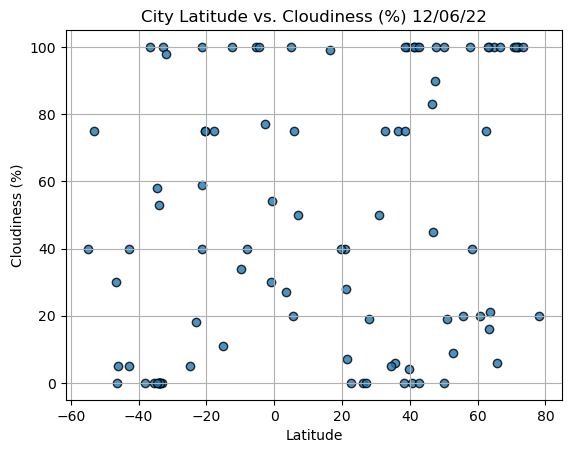

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

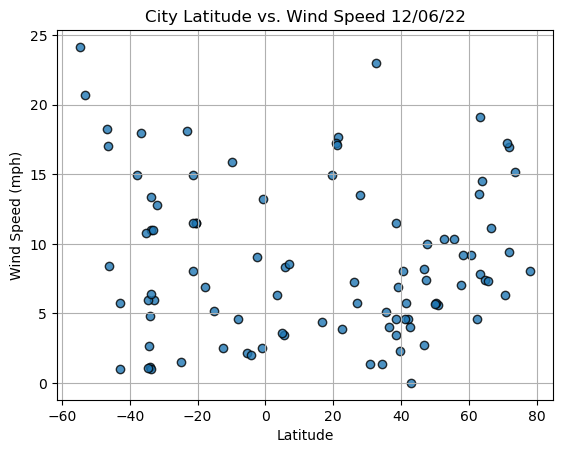

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()